# Boosted Random Walk

## 1. Problem formulation

We will consider a random walk in two dimensions where the agent takes a step of length 1 in a random direction. Let Θ be the direction of the step marked by the angle with respect to x-axis. This angle is chosen according to the probability density

$\rho(\theta) ∝ \cos^2 \theta$

given up to the normalizing factor.

**Goal:** We aim to provide a general idea on where the agent will end up after $N=1,000$ steps.

In [131]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

Let's define the class `Agent` with the following attributes:
* `x`, `y` coordinates of the agent
* `get_x()`, `get_y()` - get coordinates of the agent
* `get_coordinates()` - get both coordinates of the agent
* `set_x()`, `set_y()` - set coordinates of the agent
* `set_coordinates()` - sets both coordinates of the agent
* `make_random_step()` - makes a single step according to the probability distribution above. Updates `x` and `y`
* `make_random_walk()` - makes a random walk and updates agents coordinates

In [142]:
class Agent:
  def __init__(self,
               x: float = 0,
               y: float = 0):
    self.x = x
    self.y = y
    # Define the set of angles the agent can choose
    # Start from 0, end at 359 deg, step 1 deg
    self.allowed_angles = np.linspace(0, 2*np.pi, 360)
    # Set the weights according to the probability density function
    self.pdf_weights = np.cos(self.allowed_angles)**2

  def get_x(self):
    return self.x

  def get_y(self):
    return self.y

  def get_coordinates(self):
    """Returns coordinates of the agent"""
    return self.x, self.y

  def set_x(self, new_X):
    """Sets the x coordinate to new_X"""
    self.x = new_X

  def set_y(self, new_Y):
    """Sets the y coordinate to new_Y"""
    self.y = new_Y

  def set_coordinates(self, new_X, new_Y):
    """Sets agent's coordinates to new_X and new_Y"""
    self.x = new_X
    self.y = new_Y

  def make_random_step(self):
    """
    Makes a step according to the given probability density.
    Updates the coordinates of the agent.
    """
    # Choose the angle
    random_angle = random.choices(self.allowed_angles,
                                  weights = self.pdf_weights)
    # Get the steps in x and y directions
    x_step, y_step = np.cos(random_angle), np.sin(random_angle)
    # Set the agent coordinates to new values
    self.x = self.x + x_step
    self.y = self.y + y_step

  def make_random_walk(self, N_STEPS: int = 1000, detailed: bool = False):
    """
    Peforms N_STEPS steps of the agent.

    If detailed == True, returns a tuple with lists of x and y coordinates
    of the agent during the trajectory.

    If detailed == False, returns a tuple with final x and y coordinates of
    the agent.
    """
    if detailed == True:
      x_list = [self.x,]
      y_list = [self.y,]

    # Perform N_STEPS steps
    for __ in range(N_STEPS):
      self.make_random_step()
      if detailed == True:
        x_list.append(self.x[0])
        y_list.append(self.y[0])

    if detailed == True:
      return x_list, y_list
    else:
      return self.x[0], self.y[0]

Let's plot the unnormalized probability density function

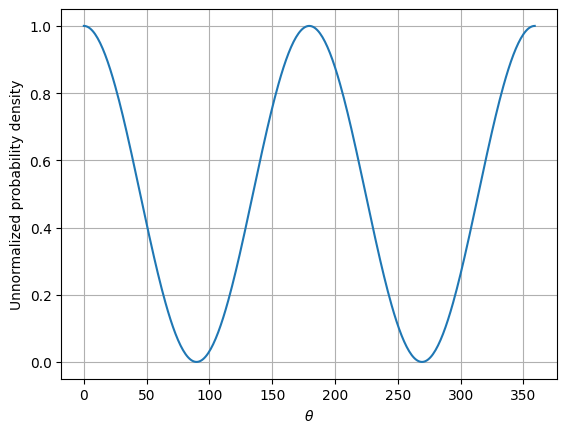

In [143]:
agent = Agent(0,0)

plt.plot(agent.pdf_weights)
plt.xlabel(r"$\theta$");
plt.ylabel("Unnormalized probability density");
plt.grid(True)

## 2. Monte Carlo - overview

Monte Carlo simulations typically have 3 elements:
1. Single simulation. We have already defined it in the `make_random_step()` method in `Agent` class.
2. Repeating multiple simulations. We will do it 100,000 times
3. Representing the final result in human-understandable form (plot, equation etc.)

Before getting down to Monte Carlo simulations, let's plot 2 example trajectories of the agent.

In [144]:
# Generate trajectory 1
trajectory_1 = agent.make_random_walk(N_STEPS = 1000, detailed = True)
# Reset the agent to be back at the origin
agent.set_coordinates(0,0)
# Generate trajectory 2
trajectory_2 = agent.make_random_walk(N_STEPS = 1000, detailed = True)

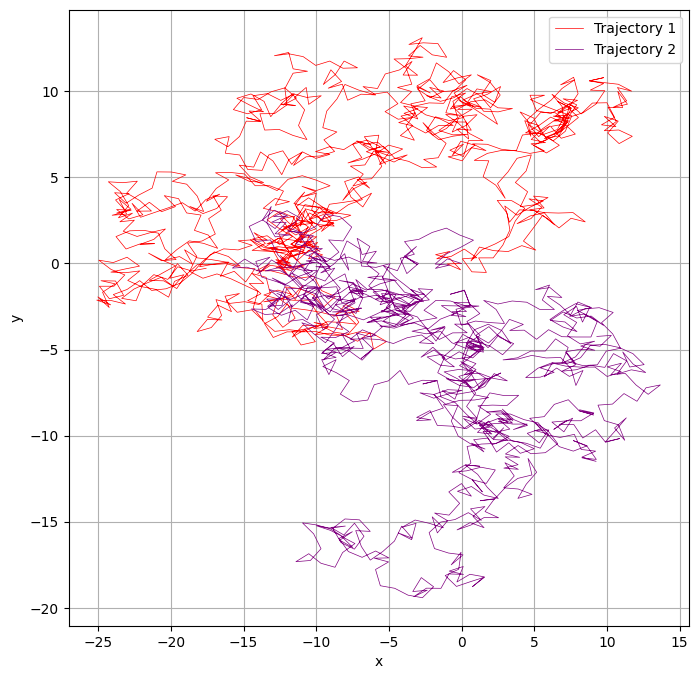

In [145]:
plt.figure(figsize=(8,8))
plt.plot(trajectory_1[0], trajectory_1[1], linewidth = 0.5,
         color = "red", label = "Trajectory 1")
plt.plot(trajectory_2[0], trajectory_2[1], linewidth = 0.5,
         color = "purple", label = "Trajectory 2")
plt.grid(True)
plt.legend()
plt.xlabel("x");
plt.ylabel("y");

## 3. Monte Carlo simulations

Let's initialize multiple agents and plot their final positions.

In [146]:
# Number of Monte Carlo simulations
N_SIMULATIONS = 10000

In [147]:
# Initialize the lists storing the final coordinates of the agents
x_list = []
y_list = []

for __ in tqdm(range(N_SIMULATIONS)):
  # Initialize the agent at the origin
  test_agent = Agent(0,0)

  # Make random walk
  x, y = test_agent.make_random_walk()
  x_list.append(x)
  y_list.append(y)

  0%|          | 0/10000 [00:00<?, ?it/s]

### Final result: distribution of final positions of the agent

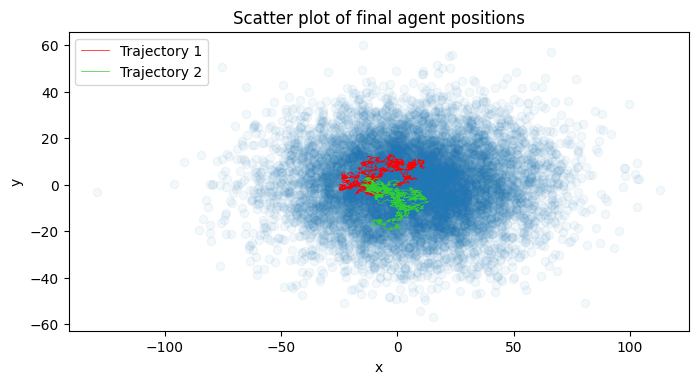

In [151]:
fig, ax1 = plt.subplots(figsize=(8,4))

ax1.plot(trajectory_1[0], trajectory_1[1], linewidth = 0.5,
         color = "red", label = "Trajectory 1")
ax1.plot(trajectory_2[0], trajectory_2[1], linewidth = 0.5,
         color = "limegreen", label = "Trajectory 2")
ax1.scatter(x_list, y_list, alpha = 0.05)
ax1.set_aspect(1)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Scatter plot of final agent positions")
ax1.legend()

plt.show()